In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen as uReq


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import rcParams

%matplotlib inline

In [3]:
adp_2019 = pd.read_csv('adp_by_position_19/adp_2019.csv')

In [4]:
adp_2019.head()

,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team
0,1,"Barkley, Saquon",1.82,1,369,56,RB,NYG
1,2,"McCaffrey, Christian",3.07,1,205,57,RB,CAR
2,3,"Kamara, Alvin",3.55,1,249,54,RB,NOS
3,4,"Elliott, Ezekiel",5.48,1,201,57,RB,DAL
4,5,"Hopkins, DeAndre",6.50,1,210,58,WR,HOU


Now that I have pulled in the player data for 2019 im going to break it down by position

In [5]:
adp_2019.shape

(397, 8)

In [6]:
rb_adp_19 = adp_2019.loc[adp_2019['Position'] == 'RB']

In [7]:
rb_adp_19


,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team
0,1,"Barkley, Saquon",1.82,1,369,56,RB,NYG
1,2,"McCaffrey, Christian",3.07,1,205,57,RB,CAR
2,3,"Kamara, Alvin",3.55,1,249,54,RB,NOS
3,4,"Elliott, Ezekiel",5.48,1,201,57,RB,DAL
6,7,"Johnson, David",10.68,1,221,59,RB,ARI
...,...,...,...,...,...,...,...,...
383,384,"Ajayi, Jay",225.14,2,803,7,RB,FA
384,385,"Gallman, Wayne",225.30,6,1029,8,RB,NYG
386,387,"Blue, Alfred",225.70,7,707,9,RB,FA
390,391,"Martin, Doug",233.00,8,914,7,RB,FA


In [8]:
rb_adp_19['PositionRank'] = rb_adp_19['Rank'].rank(ascending = True)

rb_adp_19.sort_values(by = 'PositionRank').head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team,PositionRank
0,1,"Barkley, Saquon",1.82,1,369,56,RB,NYG,1.0
1,2,"McCaffrey, Christian",3.07,1,205,57,RB,CAR,2.0
2,3,"Kamara, Alvin",3.55,1,249,54,RB,NOS,3.0
3,4,"Elliott, Ezekiel",5.48,1,201,57,RB,DAL,4.0
6,7,"Johnson, David",10.68,1,221,59,RB,ARI,5.0
7,8,"Bell, Le'Veon",10.99,1,194,59,RB,NYJ,6.0
9,10,"Conner, James",11.70,1,259,53,RB,PIT,7.0
12,13,"Gurley, Todd",13.72,1,187,60,RB,LAR,8.0
16,17,"Cook, Dalvin",16.34,1,216,61,RB,MIN,9.0
17,18,"Chubb, Nick",17.15,1,360,57,RB,CLE,10.0


Now I will go through this and do this for every position to rank all of the players by where they were drafted compared to their position

In [9]:
wr_adp_19 = adp_2019.loc[adp_2019['Position'] == 'WR']

In [10]:
te_adp_19 = adp_2019.loc[adp_2019['Position'] == 'TE']

In [11]:
qb_adp_19 = adp_2019.loc[adp_2019['Position'] == 'QB']

In [12]:
pk_adp_19 = adp_2019.loc[adp_2019['Position'] == 'PK']

In [13]:
def_adp_19 = adp_2019.loc[adp_2019['Position'] == 'Def']

In [14]:
wr_adp_19['PositionRank'] = wr_adp_19['Rank'].rank(ascending = True)
wr_adp_19.sort_values(by = 'PositionRank').head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team,PositionRank
4,5,"Hopkins, DeAndre",6.50,1,210,58,WR,HOU,1.0
5,6,"Adams, Davante",9.48,1,207,57,WR,GBP,2.0
8,9,"Thomas, Michael",11.46,1,205,59,WR,NOS,3.0
10,11,"Jones, Julio",12.63,1,247,58,WR,ATL,4.0
11,12,"Beckham, Odell",13.26,1,208,58,WR,CLE,5.0
14,15,"Smith-Schuster, JuJu",14.99,1,211,58,WR,PIT,6.0
19,20,"Hill, Tyreek",19.03,1,247,59,WR,KCC,7.0
24,25,"Thielen, Adam",27.33,1,187,62,WR,MIN,8.0
25,26,"Allen, Keenan",28.41,1,192,64,WR,LAC,9.0
26,27,"Diggs, Stefon",29.22,1,186,63,WR,MIN,10.0


In [15]:
te_adp_19['PositionRank'] = te_adp_19['Rank'].rank(ascending = True)
te_adp_19.sort_values(by = 'PositionRank').head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team,PositionRank
15,16,"Kelce, Travis",16.14,1,208,61,TE,KCC,1.0
23,24,"Ertz, Zach",27.30,1,190,60,TE,PHI,2.0
29,30,"Kittle, George",31.48,1,248,62,TE,SFO,3.0
55,56,"Howard, O.J.",55.73,1,438,65,TE,TBB,4.0
61,62,"Henry, Hunter",64.09,2,339,66,TE,LAC,5.0
84,85,"Cook, Jared",75.66,1,476,66,TE,NOS,6.0
87,88,"Smith Jr., Irv",76.53,2,605,36,TE,MIN,7.0
90,91,"Sternberger, Jace",78.00,1,607,30,TE,GBP,8.0
95,96,"Hockenson, T.J.",80.30,1,403,83,TE,DET,9.0
112,113,"Fant, Noah",86.46,1,508,58,TE,DEN,10.0


In [16]:
qb_adp_19['PositionRank'] = qb_adp_19['Rank'].rank(ascending = True)
qb_adp_19.sort_values(by = 'PositionRank').head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team,PositionRank
13,14,"Mahomes, Patrick",13.94,1,250,54,QB,KCC,1.0
31,32,"Watson, Deshaun",32.17,1,231,59,QB,HOU,2.0
38,39,"Rodgers, Aaron",40.33,1,209,62,QB,GBP,3.0
47,48,"Mayfield, Baker",49.30,1,353,59,QB,CLE,4.0
52,53,"Ryan, Matt",54.63,1,215,63,QB,ATL,5.0
62,63,"Wentz, Carson",64.41,1,196,64,QB,PHI,6.0
66,67,"Wilson, Russell",66.26,1,225,65,QB,SEA,7.0
73,74,"Brees, Drew",70.16,1,254,66,QB,NOS,8.0
75,76,"Murray, Kyler",70.84,1,368,91,QB,ARI,9.0
78,79,"Haskins, Dwayne",72.54,1,615,42,QB,WAS,10.0


In [17]:
def_adp_19['PositionRank'] = def_adp_19['Rank'].rank(ascending = True)
def_adp_19.sort_values(by = 'PositionRank').head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team,PositionRank
105,106,"Bears, Chicago",82.55,1,471,51,Def,CHI,1.0
174,175,"Rams, Los Angeles",108.26,3,413,53,Def,LAR,2.0
187,188,"Chargers, Los Angeles",113.17,4,368,52,Def,LAC,3.0
194,195,"Jaguars, Jacksonville",115.12,1,488,54,Def,JAC,4.0
196,197,"Ravens, Baltimore",116.54,4,374,53,Def,BAL,5.0
213,214,"Vikings, Minnesota",123.95,5,403,53,Def,MIN,6.0
246,247,"Patriots, New England",135.35,4,397,46,Def,NEP,7.0
251,252,"Texans, Houston",137.28,4,456,46,Def,HOU,8.0
258,259,"Browns, Cleveland",139.74,6,411,47,Def,CLE,9.0
261,262,"Broncos, Denver",140.75,7,496,44,Def,DEN,10.0


In [18]:
pk_adp_19['PositionRank'] = pk_adp_19['Rank'].rank(ascending = True)
pk_adp_19.sort_values(by = 'PositionRank').head(15)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team,PositionRank
169,170,"Zuerlein, Greg",106.39,1,959,51,PK,LAR,1.0
188,189,"Tucker, Justin",113.63,2,1104,53,PK,BAL,2.0
204,205,"Butker, Harrison",120.57,1,1109,55,PK,KCC,3.0
220,221,"Lutz, Wil",126.96,3,1155,56,PK,NOS,4.0
237,238,"Gostkowski, Stephen",132.29,3,1166,55,PK,NEP,5.0
256,257,"Gould, Robbie",139.26,3,1108,49,PK,SFO,6.0
257,258,"Fairbairn, Ka'imi",139.40,5,1229,56,PK,HOU,7.0
282,283,"Bryant, Matt",148.80,7,996,18,PK,FA,8.0
294,295,"Myers, Jason",155.84,5,1235,38,PK,SEA,9.0
298,299,"Elliott, Jake",157.06,6,1270,44,PK,PHI,10.0


In [41]:
adp_19_ranked = pd.concat([wr_adp_19, rb_adp_19, qb_adp_19, pk_adp_19, te_adp_19, def_adp_19])
adp_19_ranked = adp_19_ranked.sort_values(by = 'Rank')

In [42]:
adp_19_ranked

,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team,PositionRank
0,1,"Barkley, Saquon",1.82,1,369,56,RB,NYG,1.0
1,2,"McCaffrey, Christian",3.07,1,205,57,RB,CAR,2.0
2,3,"Kamara, Alvin",3.55,1,249,54,RB,NOS,3.0
3,4,"Elliott, Ezekiel",5.48,1,201,57,RB,DAL,4.0
4,5,"Hopkins, DeAndre",6.50,1,210,58,WR,HOU,1.0
...,...,...,...,...,...,...,...,...,...
392,393,"James, Jesse",236.05,7,960,6,TE,DET,38.0
393,394,"Thomas, Jordan",237.50,2,904,6,TE,HOU,39.0
394,395,"Conley, Chris",240.50,12,931,6,WR,JAC,103.0
395,396,"Watson, Justin",242.45,17,799,5,WR,TBB,104.0


In [38]:
rb_adp_19.to_csv('adp_rb_2019.csv', index = False)
wr_adp_19.to_csv('adp_wr_2019.csv', index = False)
te_adp_19.to_csv('adp_te_2019.csv', index = False)
qb_adp_19.to_csv('adp_qb_2019.csv', index = False)
def_adp_19.to_csv('adp_def_2019.csv', index = False)
pk_adp_19.to_csv('adp_pk_2019.csv', index = False)


In [52]:
adp_19_ranked.to_csv('adp_ranked_2019.csv', index = False)

In [29]:
pk_rank = pk_adp_19['Rank']
pk_rank.head()

169    170
188    189
204    205
220    221
237    238
Name: Rank, dtype: int64

In [21]:
qb_rank= qb_adp_19['Rank']

In [22]:
rb__rank = rb_adp_19['Rank']

In [23]:
wr_rank = wr_adp_19['Rank']

In [24]:
te_rank = te_adp_19['Rank']

In [25]:
def_rank = def_adp_19['Rank']

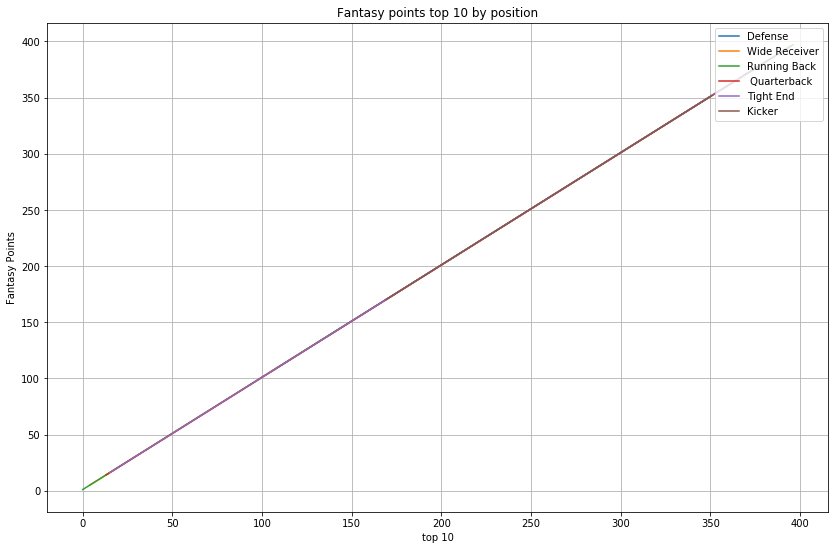

In [26]:
rcParams['figure.figsize'] = 14,9
plt.plot(def_rank, label = "Defense")
plt.plot(wr_rank, label = "Wide Receiver")
plt.plot(rb__rank, label = "Running Back")
plt.plot(qb_rank, label = " Quarterback")
plt.plot(te_rank, label = "Tight End")
plt.plot(pk_rank, label = "Kicker")
plt.grid(True)
plt.title('Fantasy points top 10 by position')
plt.xlabel('top 10')
plt.ylabel('Fantasy Points')
plt.legend(loc = 1)

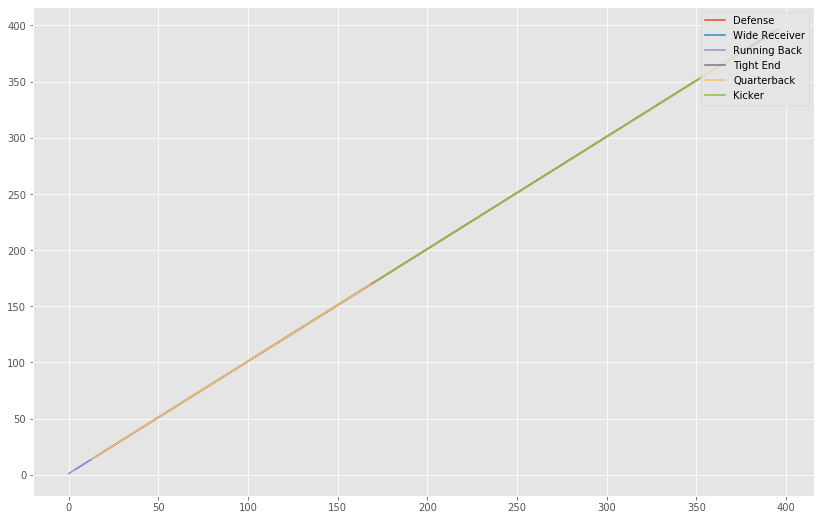

In [59]:
plt.style.use('ggplot')
def_rank.plot(x = 'Rank', y='PositionRank', kind = 'line', label = "Defense")
wr_rank.plot(x = 'Rank', y='PositionRank', kind = 'line', label = "Wide Receiver")
rb__rank.plot(x = 'Rank', y='PositionRank', kind = 'line', label = "Running Back")
te_rank.plot(x = 'Rank', y='PositionRank', kind = 'line', label = "Tight End")
qb_rank.plot(x = 'Rank', y='PositionRank', kind = 'line', label = "Quarterback")
pk_rank.plot(x = 'Rank', y='Avg Pick', kind = 'line', label = "Kicker")

plt.legend(loc = 1)

# rcParams['figure.figsize'] = 14,9
# plt.plot(def_rank, label = "Defense")
# plt.plot(wr_rank, label = "Wide Receiver")
# plt.plot(rb__rank, label = "Running Back")
# plt.plot(qb_rank, label = " Quarterback")
# plt.plot(te_rank, label = "Tight End")
# plt.plot(pk_rank, label = "Kicker")
# plt.grid(True)
# plt.title('Fantasy points top 10 by position')
# plt.xlabel('top 10')
# plt.ylabel('Fantasy Points')
# plt.legend(loc = 1)

In [53]:
adp_19_ranked.head()

,Rank,Player,Avg Pick,Min Pick,Max Pick,% Selected,Position,Team,PositionRank
0,1,"Barkley, Saquon",1.82,1,369,56,RB,NYG,1.0
1,2,"McCaffrey, Christian",3.07,1,205,57,RB,CAR,2.0
2,3,"Kamara, Alvin",3.55,1,249,54,RB,NOS,3.0
3,4,"Elliott, Ezekiel",5.48,1,201,57,RB,DAL,4.0
4,5,"Hopkins, DeAndre",6.50,1,210,58,WR,HOU,1.0


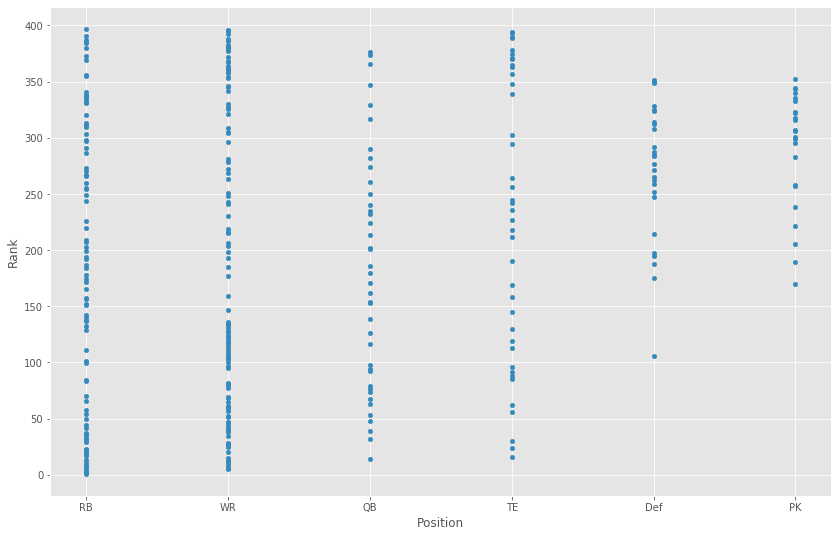

In [61]:
plt.style.use('ggplot')
adp_19_ranked.plot(x = 'Position', y='Rank', kind = 'scatter')